# Problem Description 

##Predicting the final price of each home based on various features


In [0]:

import numpy as np
import pandas as pd 

In [0]:
#Reading the data 
price1 = pd.read_csv("/content/train.csv")





#Columns Description

#Target Variable:
##SalePrice - Property's sale price in dollars. This is the target variable that we are trying to predict.

#Features:
##MSSubClass: The building class
##MSZoning: The general zoning classification
##LotFrontage: Linear feet of street connected to property
##LotArea: Lot size in square feet
##Street: Type of road access
##Alley: Type of alley access#Narrow Passage between buildings
##LotShape: General shape of property#IR-irregular,Reg-Regular
##LandContour: Flatness of the property
##Utilities: Type of utilities available
##LotConfig: Lot configuration
##LandSlope: Slope of property
##Neighborhood: Physical locations within Ames city limits
##Condition1: Proximity to main road or railroad
##Condition2: Proximity to main road or railroad (if a second is present)
##BldgType: Type of dwelling
##HouseStyle: Style of dwelling
##OverallQual: Overall material and finish quality
##OverallCond: Overall condition rating
##YearBuilt: Original construction date
##YearRemodAdd: Remodel date
##RoofStyle: Type of roof
##RoofMatl: Roof material
##Exterior1st: Exterior covering on house
##Exterior2nd: Exterior covering on house (if more than one material)
##MasVnrType: Masonry veneer type
##MasVnrArea: Masonry veneer area in square feet
##ExterQual: Exterior material quality
##ExterCond: Present condition of the material on the exterior
##Foundation: Type of foundation
##BsmtQual: Height of the basement
##BsmtCond: General condition of the basement
##BsmtExposure: Walkout or garden level basement walls
##BsmtFinType1: Quality of basement finished area
##BsmtFinSF1: Type 1 finished square feet
##BsmtFinType2: Quality of second finished area (if present)
##BsmtFinSF2: Type 2 finished square feet
##BsmtUnfSF: Unfinished square feet of basement area
##TotalBsmtSF: Total square feet of basement area
##Heating: Type of heating
##HeatingQC: Heating quality and condition
##CentralAir: Central air conditioning
##Electrical: Electrical system
##1stFlrSF: First Floor square feet
##2ndFlrSF: Second floor square feet
##LowQualFinSF: Low quality finished square feet (all floors)
##GrLivArea: Above grade (ground) living area square feet
##BsmtFullBath: Basement full bathrooms
##BsmtHalfBath: Basement half bathrooms
##FullBath: Full bathrooms above grade
##HalfBath: Half baths above grade
##Bedroom: Number of bedrooms above basement level
##Kitchen: Number of kitchens
##KitchenQual: Kitchen quality
##TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
##Functional: Home functionality rating
##Fireplaces: Number of fireplaces
##FireplaceQu: Fireplace quality
##GarageType: Garage location
##GarageYrBlt: Year garage was built
##GarageFinish: Interior finish of the garage
##GarageCars: Size of garage in car capacity
##GarageArea: Size of garage in square feet
##GarageQual: Garage quality
##GarageCond: Garage condition
##PavedDrive: Paved driveway
##WoodDeckSF: Wood deck area in square feet
##OpenPorchSF: Open porch area in square feet
##EnclosedPorch: Enclosed porch area in square feet
##3SsnPorch: Three season porch area in square feet
##ScreenPorch: Screen porch area in square feet
##PoolArea: Pool area in square feet
##PoolQC: Pool quality
##Fence: Fence quality
##MiscFeature: Miscellaneous feature not covered in other categories
##MiscVal: $Value of miscellaneous feature
##MoSold: Month Sold
##YrSold: Year Sold
##SaleType: Type of sale
##SaleCondition: Condition of sale

#Steps Followed:
##1.Checking Null values
##2.Separating Categorical and Numeric Variables
##3.Imputing Null values
##4.Outlier Analysis
##5.Univariate Data analysis for Catergorical and continuous variables
##6.Comparing Target Variable "Sale Price " with all the features and drawing analysis
##7.Exploratory Data Analysis with multiple features
##8.Test of Independence for Categorical Variables
##9.Correlation test for continuous variables
##10.Building model using Stats Model
##11.Checking VIF 
##12.Checking p-values 
##13.Re building the model by removing variables which have high p-values and vif 
##14.Minimizing the no. of features using Recursive Feature Elimination
##15.Drawing Residual plots 


#Overview of Data


In [3]:
pd.set_option('display.max_columns', 100)

price1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
price1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
price1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### We can see that there are outliers in MasVnrArea, Total Basement Square Feet, 2nd Flr Square Feet, Wood Deck Square Feet as we can see a variation between 25%-50% and 50%-75%

## When we have more features some values will be  hidden
## To display all the column values we have used the below code


In [0]:
pd.set_option('display.max_rows', 100)

##Checking Null Values


In [7]:
null_columns=price1.columns[price1.isnull().any()]
price1[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [0]:
# price1.isna().sum()

##Removing variables not required for Analysis

In [0]:
price=price1.drop(['Id'],axis=1)

##Converting object type into one category


In [0]:
cat_columns=['FullBath','HalfBath','BsmtHalfBath','BsmtFullBath','OverallQual','OverallCond',
             'MSSubClass','YearBuilt','Fireplaces','GarageCars','YrSold','YearRemodAdd','MSSubClass',
            'TotRmsAbvGrd','BedroomAbvGr','KitchenAbvGr','GarageYrBlt','MoSold']

price[cat_columns]=price[cat_columns].astype('category')
cat=price.select_dtypes(include=['object'])
price[cat.columns]=price[cat.columns].astype('category')


##Grouping Categorical and Discrete data for Removing Null Values
##cat1 is a combination of categorical and discrete numeric.
##cont1 consists of continuous variable
##This separation is used in Imputing Null Values,Plots and Outlier Analysis

In [0]:

cat1 = price.select_dtypes(include=['category'])
cont1 = price.select_dtypes(include =['int64','float64'])



##Imputing Null values:
##For Categorical and Numeric variables we are imputing with mode and for Continuous we are imputing with mean

In [0]:


price[cont1.columns]=price[cont1.columns].fillna(price[cont1.columns].mean())
price[cat1.columns]=price[cat1.columns].fillna(price[cat1.columns].mode().iloc[0])

##Separating Data into Categorical Discrete and Continuous

##This Separation is used during Label Encoding 

In [0]:

price[cat_columns]=price[cat_columns].astype('int64')
price[cont1.columns] = price[cont1.columns].astype('float64')

category= price.select_dtypes(include=['category'])
discrete=price.select_dtypes(include=['int64'])
continuous=price.select_dtypes(include=['float64'])


#Outlier Analysis


In [14]:
for i in cont1:
      q75,q25=np.percentile(price.loc[:,i],[75,25])
      iqr=q75-q25
      min=q25-(iqr*1.5)
      max=q75+(iqr*1.5)
      print("Min value:",min)
      print("Max value:",max)
      print("")
      print('{var}-->{X} Outliers'.format(var=i,X=(price.loc[price.loc[:,i]<min,i].count()+price.loc[price.loc[:,i]>
                                        max,i].count())))

Min value: 31.5
Max value: 107.5

LotFrontage-->106 Outliers
Min value: 1481.5
Max value: 17673.5

LotArea-->69 Outliers
Min value: -246.375
Max value: 410.625

MasVnrArea-->98 Outliers
Min value: -1068.375
Max value: 1780.625

BsmtFinSF1-->7 Outliers
Min value: 0.0
Max value: 0.0

BsmtFinSF2-->167 Outliers
Min value: -654.5
Max value: 1685.5

BsmtUnfSF-->29 Outliers
Min value: 42.0
Max value: 2052.0

TotalBsmtSF-->61 Outliers
Min value: 118.125
Max value: 2155.125

1stFlrSF-->20 Outliers
Min value: -1092.0
Max value: 1820.0

2ndFlrSF-->2 Outliers
Min value: 0.0
Max value: 0.0

LowQualFinSF-->26 Outliers
Min value: 158.625
Max value: 2747.625

GrLivArea-->31 Outliers
Min value: -27.75
Max value: 938.25

GarageArea-->21 Outliers
Min value: -252.0
Max value: 420.0

WoodDeckSF-->32 Outliers
Min value: -102.0
Max value: 170.0

OpenPorchSF-->77 Outliers
Min value: 0.0
Max value: 0.0

EnclosedPorch-->208 Outliers
Min value: 0.0
Max value: 0.0

3SsnPorch-->24 Outliers
Min value: 0.0
Max value

#Boxplots 

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:133

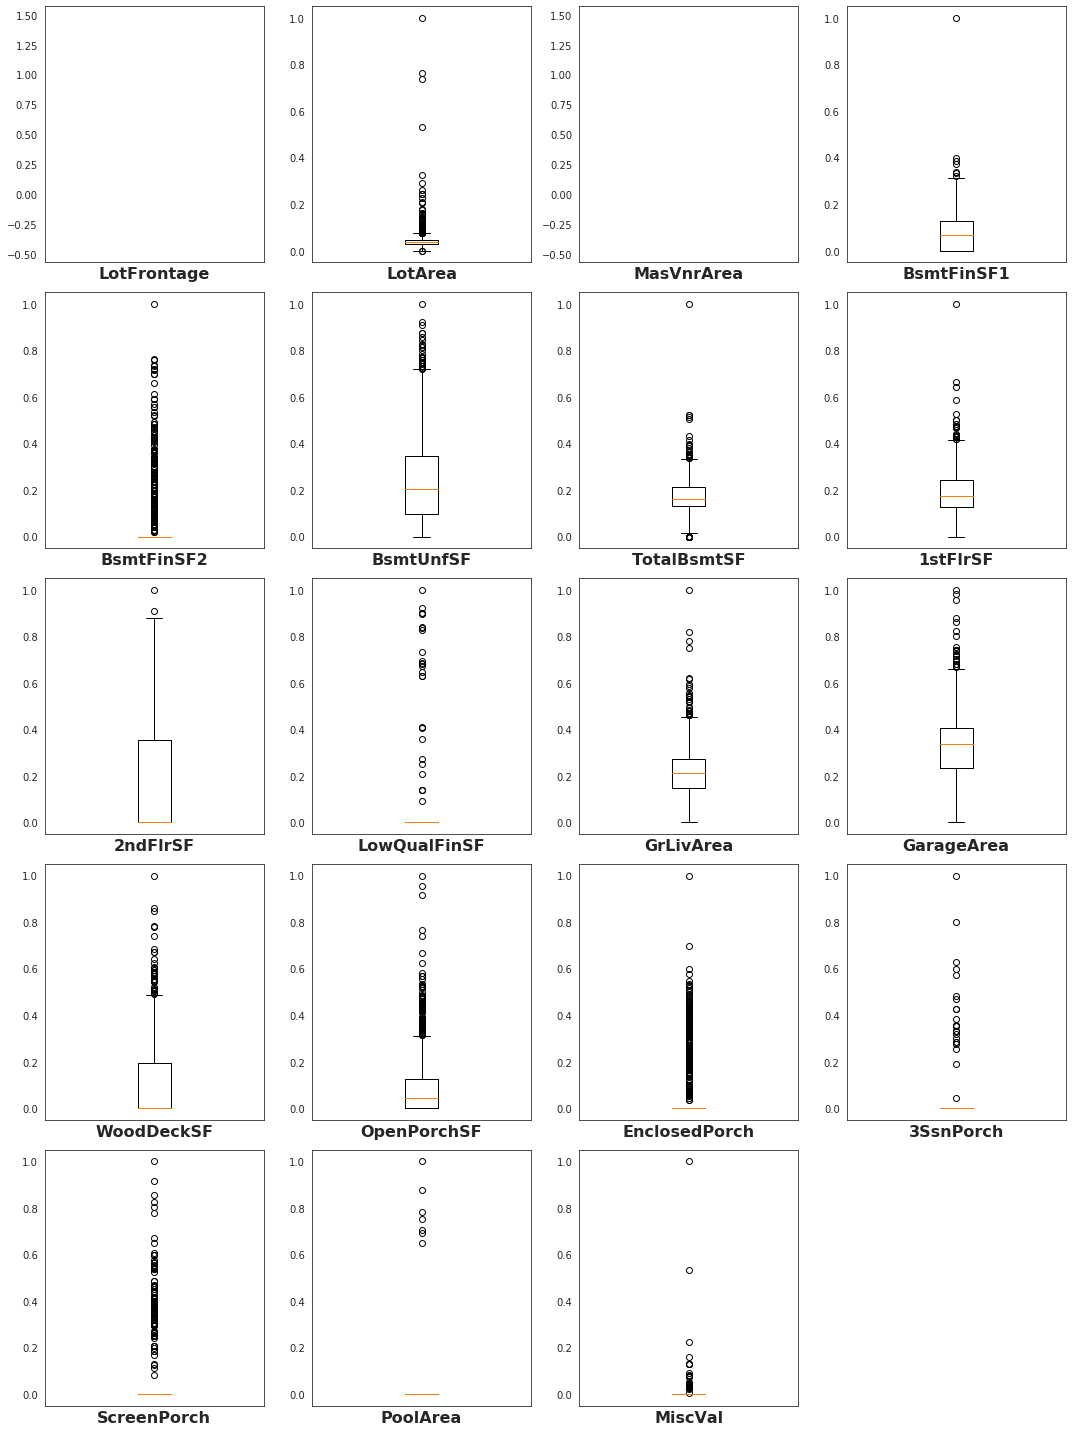

In [15]:


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


cont2=cont1.copy()

from sklearn.preprocessing import MinMaxScaler 
std=MinMaxScaler()
df_scaled = pd.DataFrame(std.fit_transform(cont2), columns=cont2.columns)
df_scaled.head()

sns.set_style("white")
fig = plt.figure(figsize=(15, 20))
i=1
for column in cont2.columns[:-1]:
    plt.subplot(5, 4, i);
    plt.boxplot(x=df_scaled[column],data=df_scaled);
    plt.xlabel(f'{column}', fontsize=16).set_weight('bold');
    plt.xticks([], [])
    i=i+1
    
plt.tight_layout()
plt.show();

##If we remove outliers most of the data will be lost. So we treat them as natural outliers. 
##If Accuracy is not met we will get back here.

#Visualization


##Bar plots for categorical variables


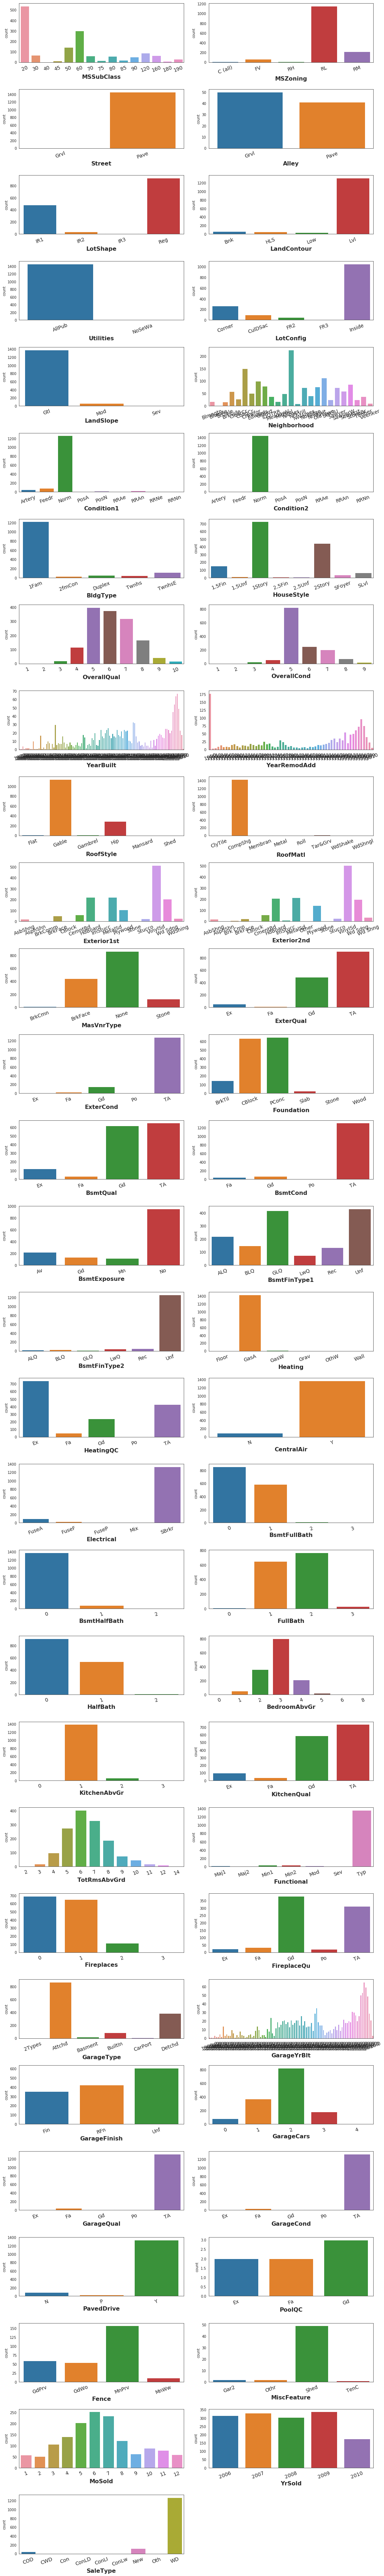

In [16]:

sns.set_style("white")
fig = plt.figure(figsize=(15, 100))
i=1
for column in cat1.columns[:-1]:
    plt.subplot(30, 2, i)
    sns.countplot(x=cat1[column],data=price)
    plt.xlabel(f'{column}', fontsize=16).set_weight('bold')
    plt.xticks(rotation=20,fontsize=14)

    i=i+1
plt.tight_layout()
plt.show() 

###Value Counts for Year Built Decade Wise






In [17]:
bins = [1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
s = pd.cut(price1['YearBuilt'], bins=bins).value_counts()
print(s)

(2000, 2010]    364
(1960, 1970]    182
(1990, 2000]    175
(1970, 1980]    174
(1950, 1960]    164
(1940, 1950]     81
(1920, 1930]     76
(1910, 1920]     71
(1980, 1990]     63
(1930, 1940]     63
(1900, 1910]     22
(1890, 1900]     14
(1870, 1880]      6
(1880, 1890]      5
Name: YearBuilt, dtype: int64


### Value Counts for Year Remodified Decade Wise

In [18]:
pd.cut(price1['YearRemodAdd'], bins=bins).value_counts()

(2000, 2010]    497
(1990, 2000]    285
(1940, 1950]    178
(1970, 1980]    159
(1960, 1970]    149
(1950, 1960]    106
(1980, 1990]     86
(1930, 1940]      0
(1920, 1930]      0
(1910, 1920]      0
(1900, 1910]      0
(1890, 1900]      0
(1880, 1890]      0
(1870, 1880]      0
Name: YearRemodAdd, dtype: int64

### Value Counts for Garage Year Built Decade Wise

In [19]:
pd.cut(price1['GarageYrBlt'], bins=bins).value_counts()

(2000, 2010]    375
(1990, 2000]    207
(1960, 1970]    186
(1970, 1980]    181
(1950, 1960]    146
(1980, 1990]     96
(1940, 1950]     65
(1930, 1940]     47
(1920, 1930]     45
(1910, 1920]     25
(1900, 1910]      5
(1890, 1900]      1
(1880, 1890]      0
(1870, 1880]      0
Name: GarageYrBlt, dtype: int64

##Dist plot for continuous variables


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


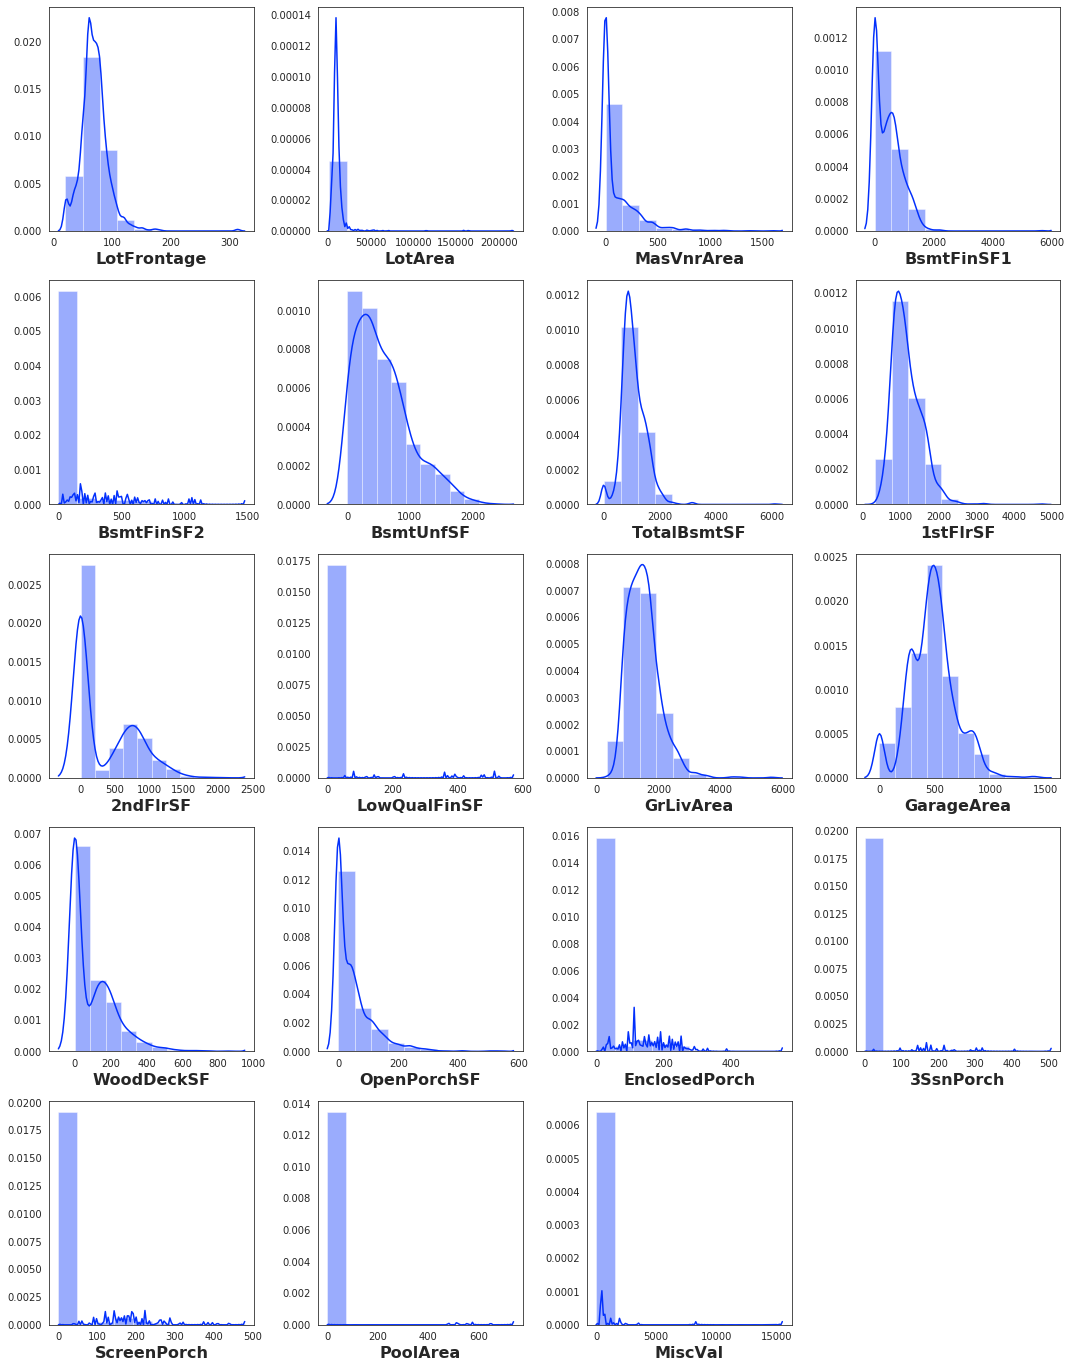

In [20]:

sns.set_style("white")
fig = plt.figure(figsize=(15, 30))
i=1
for column in cont1.columns[:-1]:
    plt.subplot(8, 4, i)
    sns.distplot(cont1[column], kde = True, bins= 10, color='#0330fc')
    plt.xlabel(f'{column}', fontsize=16).set_weight('bold')

    i=i+1
plt.tight_layout()
plt.show()

##Comparing Categorical Variables with Sale Price


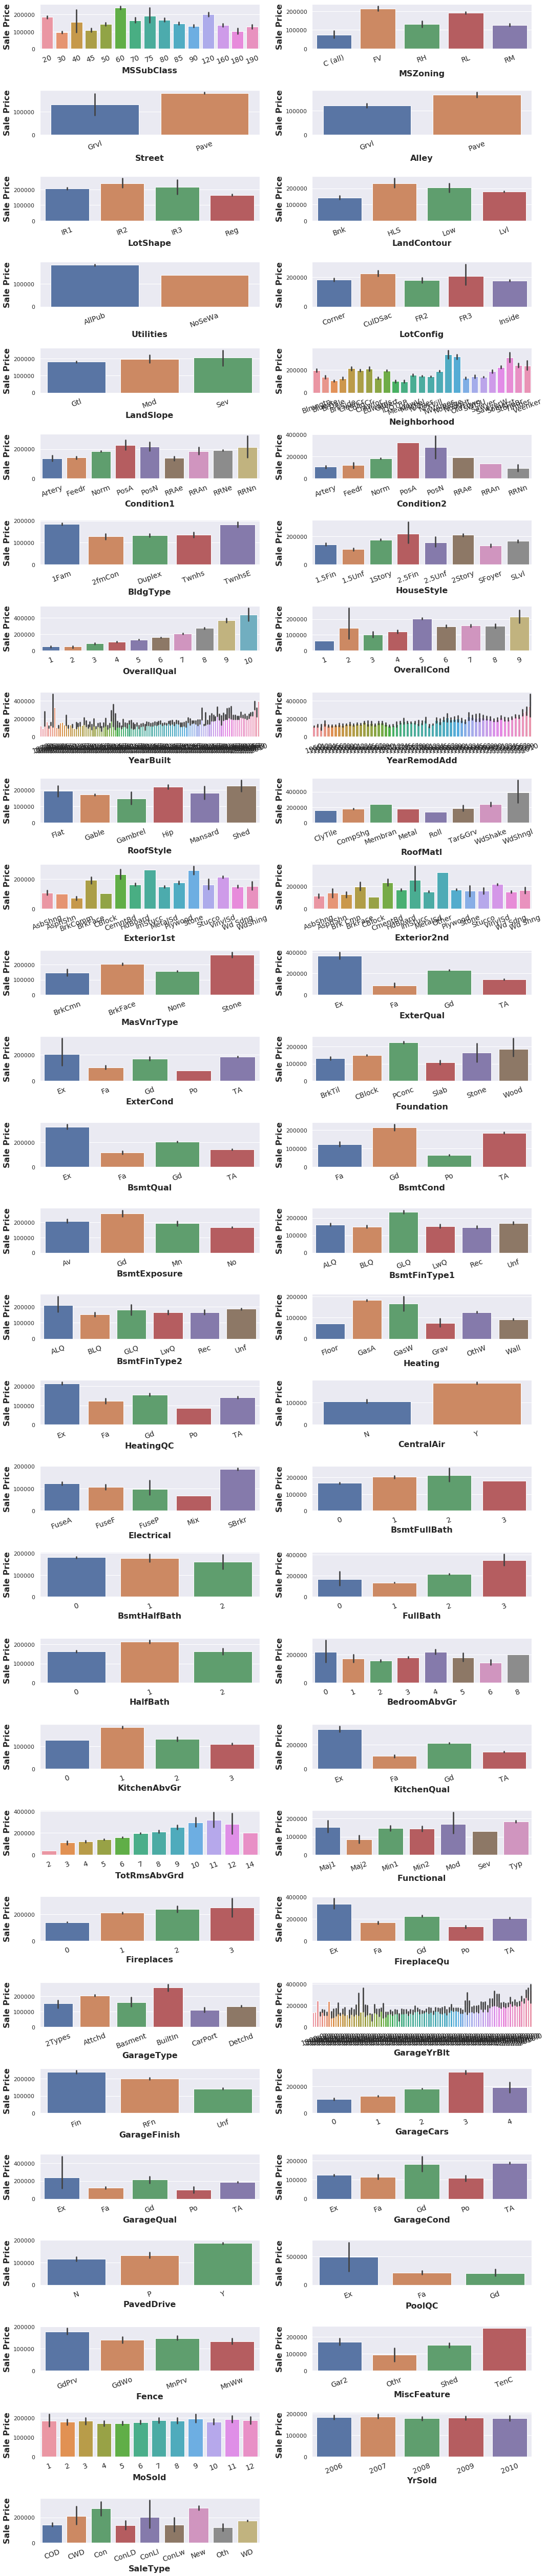

In [21]:

sns.set()
fig = plt.figure(figsize=(15, 70))
i=1
for column in cat1.columns[:-1]:
    plt.subplot(30, 2, i)
    sns.barplot(x=cat1[column], y='SalePrice', data=price)
    plt.xlabel(f'{column}', fontsize=16).set_weight('bold')
    plt.xticks(rotation=20,fontsize=14)
    plt.ylabel('Sale Price',fontsize=16).set_weight('bold')


    i=i+1
plt.tight_layout()
plt.show()


## We can see that Street, Lotshape, Utilities, OverallCondition,Heating Qc, Central Air,Total Rooms above ground, Full Bath, Fireplaces are some of the important features effecting Sale Price

#Line plots

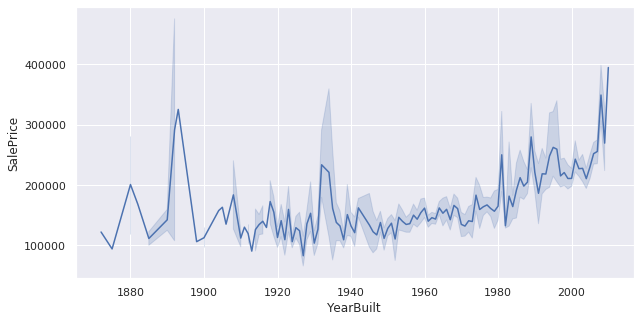

In [22]:
plt.figure(figsize=(10, 5))

sns.lineplot(x="YearBuilt", y="SalePrice", data=price1)
plt.show()

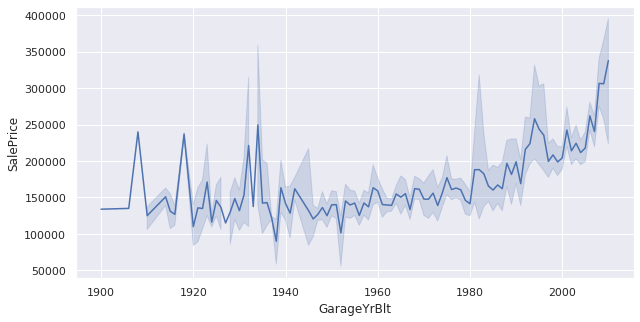

In [23]:
plt.figure(figsize=(10, 5))

sns.lineplot(x="GarageYrBlt", y="SalePrice", data=price1)
plt.show()

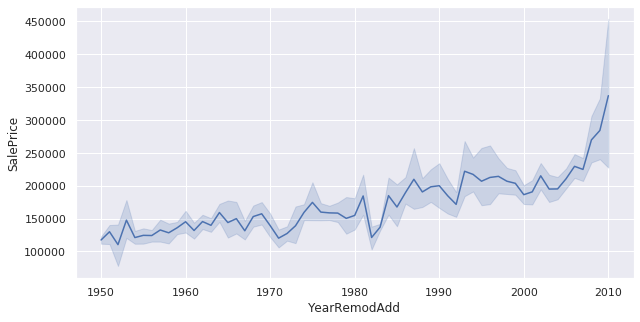

In [24]:
plt.figure(figsize=(10, 5))

sns.lineplot(x="YearRemodAdd", y="SalePrice", data=price1)
plt.show()

##There is an Increasing Trend With Respect to Year 

##ChiSquare Test

In [25]:
sales1=price.copy()
bins1=[0,100000,200000,300000,400000,500000,600000,700000,800000]
sales1['SalePrice1'] = pd.cut(x=sales1['SalePrice'], bins=bins1)
sales1.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice1
0,60,RL,65.0,8450.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003,RFn,2,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,2,2008,WD,Normal,208500.0,"(200000, 300000]"
1,20,RL,80.0,9600.0,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,5,2007,WD,Normal,181500.0,"(100000, 200000]"
2,60,RL,68.0,11250.0,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,9,2008,WD,Normal,223500.0,"(200000, 300000]"
3,70,RL,60.0,9550.0,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,2,2006,WD,Abnorml,140000.0,"(100000, 200000]"
4,60,RL,84.0,14260.0,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,12,2008,WD,Normal,250000.0,"(200000, 300000]"


In [26]:
category1=['FullBath','HalfBath','BsmtHalfBath','BsmtFullBath','OverallQual','OverallCond',
             'MSSubClass','YearBuilt','Fireplaces','GarageCars','YrSold','YearRemodAdd','MSSubClass',
            'TotRmsAbvGrd','BedroomAbvGr','KitchenAbvGr','GarageYrBlt','MoSold','SalePrice1']

from scipy.stats import chi2_contingency
factors_paired=[(i,j) for i in category1 for j in category1]
chi2, p_values = [],[]
for f in factors_paired:
    if f[0]!=f[1]:
        chitest=chi2_contingency(pd.crosstab(sales1[f[0]],sales1[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)


p1=np.array(p_values).reshape((19,19))
#p1=np.array(p_values)
p1=pd.DataFrame(p1.round(2), index=category1, columns=category1)
p1


,FullBath,HalfBath,BsmtHalfBath,BsmtFullBath,OverallQual,OverallCond,MSSubClass,YearBuilt,Fireplaces,GarageCars,YrSold,YearRemodAdd,MSSubClass,TotRmsAbvGrd,BedroomAbvGr,KitchenAbvGr,GarageYrBlt,MoSold,SalePrice1
FullBath,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00
HalfBath,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.97,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00
BsmtHalfBath,0.00,0.00,0.00,0.00,0.04,0.00,0.01,0.34,0.87,0.00,0.29,0.00,0.01,0.74,0.28,0.00,0.98,0.23,0.12
BsmtFullBath,0.00,0.00,0.00,0.00,0.01,0.74,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.48,0.49,0.00
OverallQual,0.00,0.00,0.04,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
OverallCond,0.00,0.00,0.00,0.74,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00
MSSubClass,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.97,0.00,0.00,0.00,0.00,0.00,0.00,0.35,0.00
YearBuilt,0.00,0.00,0.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00
Fireplaces,0.00,0.00,0.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.26,0.00
GarageCars,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.61,0.00


In [27]:
# Null Hypothesis: Independant:(p value>0.05) # Accept Null Hypothesis 

# Alternate Hypothesis: Dependant:(p is <0.05) # Accept Alternate Hypothesis
p2= p1[p1<0.05]
p2


,FullBath,HalfBath,BsmtHalfBath,BsmtFullBath,OverallQual,OverallCond,MSSubClass,YearBuilt,Fireplaces,GarageCars,YrSold,YearRemodAdd,MSSubClass,TotRmsAbvGrd,BedroomAbvGr,KitchenAbvGr,GarageYrBlt,MoSold,SalePrice1
FullBath,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,NaN,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.0
HalfBath,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,NaN,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.0
BsmtHalfBath,0.0,0.0,0.00,0.00,0.04,0.0,0.01,NaN,NaN,0.0,NaN,0.00,0.01,NaN,NaN,0.0,NaN,NaN,NaN
BsmtFullBath,0.0,0.0,0.00,0.00,0.01,NaN,0.00,0.0,0.0,0.0,0.02,0.00,0.00,0.01,0.0,0.0,NaN,NaN,0.0
OverallQual,0.0,0.0,0.04,0.01,0.00,0.0,0.00,0.0,0.0,0.0,NaN,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0
OverallCond,0.0,0.0,0.00,NaN,0.00,0.0,0.00,0.0,0.0,0.0,NaN,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.0
MSSubClass,0.0,0.0,0.01,0.00,0.00,0.0,0.00,0.0,0.0,0.0,NaN,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.0
YearBuilt,0.0,0.0,NaN,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.0
Fireplaces,0.0,0.0,NaN,0.00,0.00,0.0,0.00,0.0,0.0,0.0,NaN,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.0
GarageCars,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,NaN,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.0


In [0]:
#Nan=Independant

# #Getting Dependant
# for i in p2.index:
#     for j in p2.columns:
#         if ~np.isnan(p2.loc[i,j]).item():
#             print((i,j))

##Comparing Continuous Variables with Sale Price



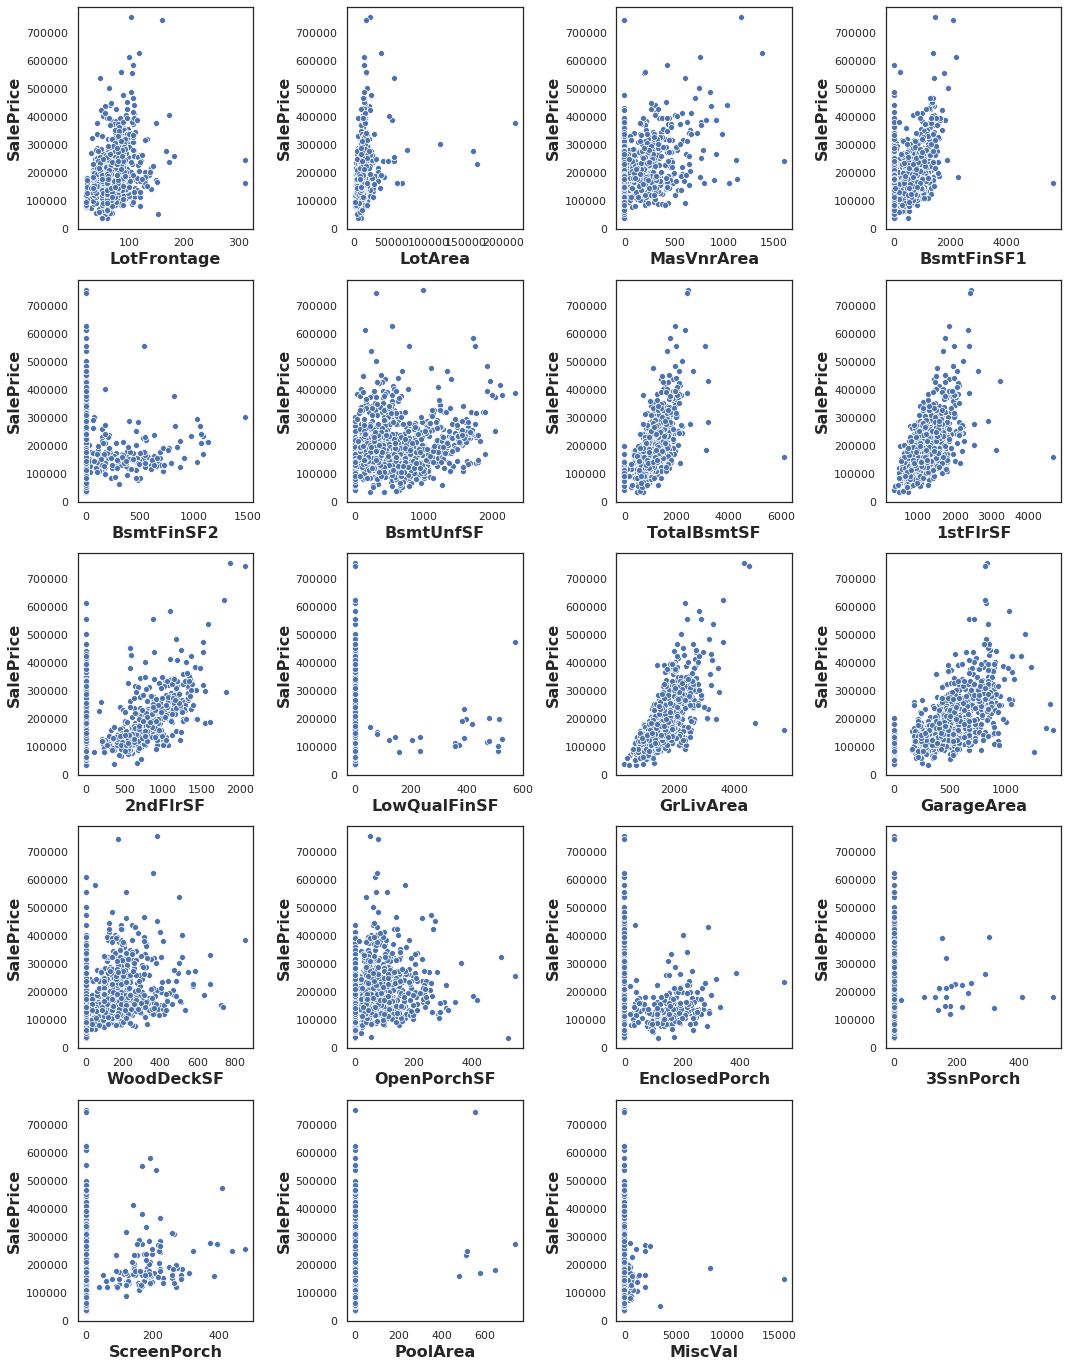

In [29]:
sns.set_style("white")
fig = plt.figure(figsize=(15, 30))
i=1
for column in cont1.columns[:-1]:
    plt.subplot(8, 4, i)
    sns.scatterplot(x=cont1[column], y='SalePrice', data=price)

    
    plt.xlabel(f'{column}', fontsize=16).set_weight('bold')
    plt.ylabel("SalePrice",fontsize=16).set_weight('bold')

    i=i+1
plt.tight_layout()
plt.show()

##Sale Price is mostly dependant on 1st Floor Sq feet, 2ndFlr Sqft and Garage Area

##Price Distribution for Different Building Types


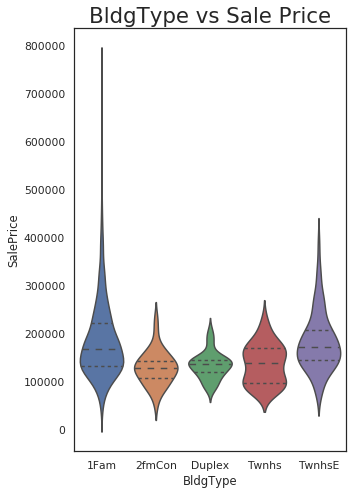

In [30]:
plt.figure(figsize=(5,8), dpi= 70)
sns.violinplot(x='BldgType', y='SalePrice', data=price, scale='width', inner='quartile')


plt.title('BldgType vs Sale Price', fontsize=22)
plt.show()

## We can see that there are more 1Fam Houses and less number of Duplex Houses .Duplex and Twnhs start from around 100,000 dollars


##Sale Price for Houses with Pool Area

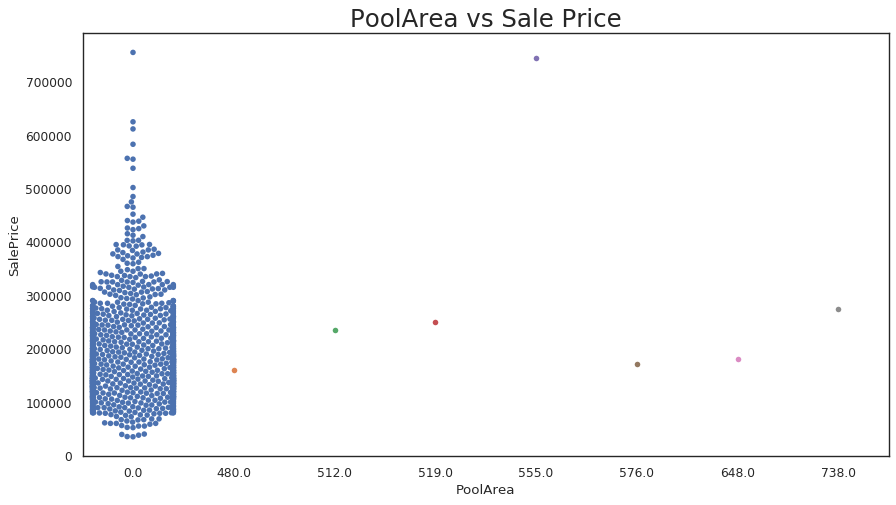

In [31]:

plt.figure(figsize=(13,7), dpi= 80)
sns.swarmplot(x='PoolArea', y='SalePrice', data=price)

plt.title('PoolArea vs Sale Price', fontsize=22)
plt.show()

##Houses with pools are very less and require around 150,000 dollars for a house with pool
##While building model we can convert this into a categorical data ie Pool Area is present or Not for getting a better model

## Analysis using different features


In [0]:
def bivariate(df,col1,col2):
    cross_name=pd.crosstab(df[col1],df[col2]).apply(lambda x: x/x.sum()*100,axis=1)
    cross_name.plot.bar(figsize=(15,4))
    plt.xlabel('{}'.format(col1))
    plt.xticks(rotation=45)
    plt.ylabel('{}'.format(col2))
    plt.title('{} vs {}'.format(col1,col2))
    plt.show()

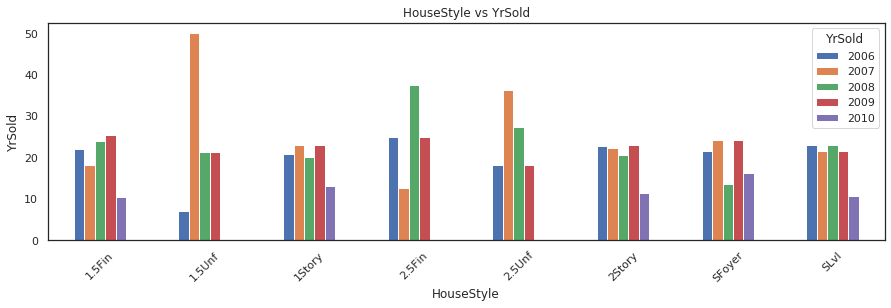

In [33]:
bivariate(price,'HouseStyle','YrSold')

In [0]:
#We can see the deviation in House Stles across all the years

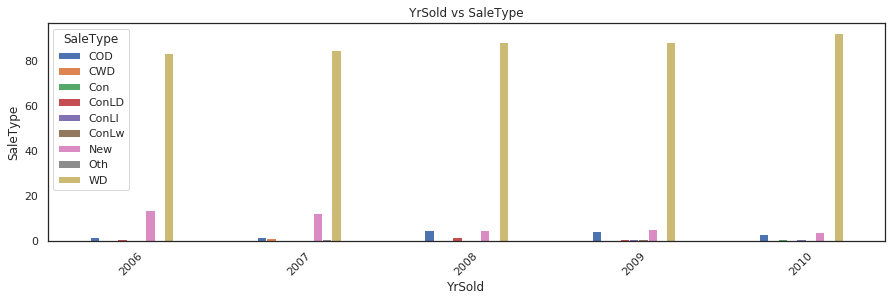

In [35]:
bivariate(price,'YrSold','SaleType')

##Sale Type WD(Warranty) is mostly sold.
##It pledges or warrants that the owner owns the property free and clear of any outstanding loans, mortgages, or other encumbrances against it.

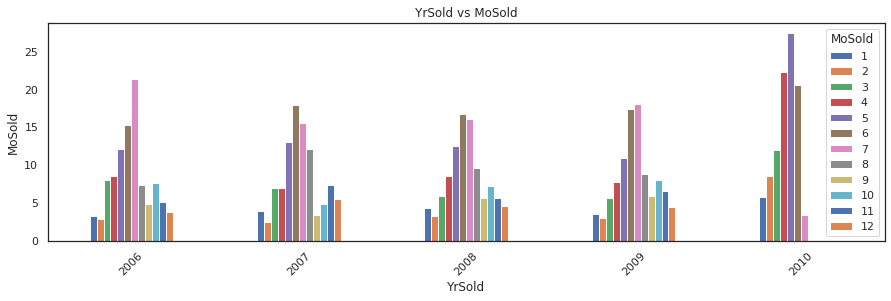

In [36]:
bivariate(price,'YrSold','MoSold')

##Most of the plot sales happened in June and July till 2009
##In 2010 most of the plot sales happened in May and April

##Viewing Trend of Sales


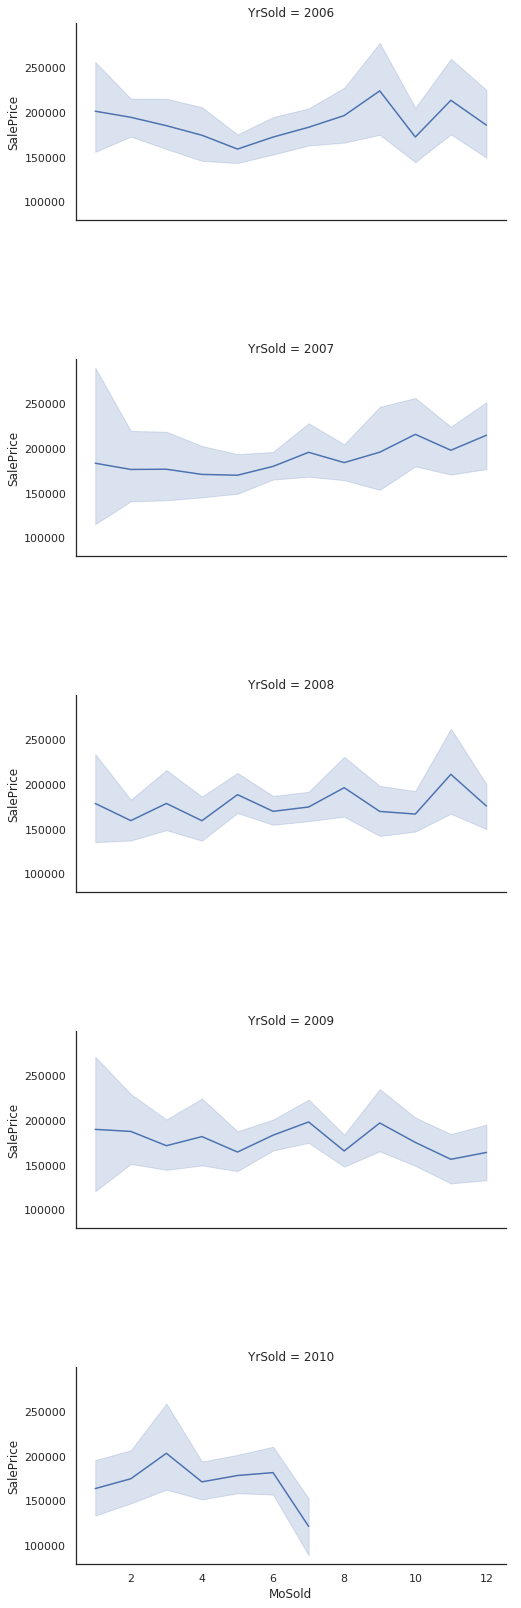

In [37]:

FacetGrid = sns.FacetGrid(price, row='YrSold', height=4.5,aspect=1.6)    
FacetGrid.map(sns.lineplot, 'MoSold','SalePrice',palette=None,hue_order=None)

FacetGrid.add_legend()
plt.subplots_adjust(hspace=0.7, wspace=0.6)

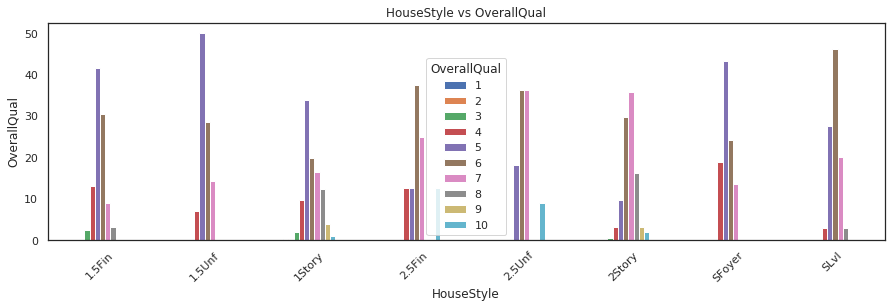

In [38]:
bivariate(price,'HouseStyle','OverallQual')

##2.5 Fin and 2.5 Unf have maximum overall quality House Style 2.5 Fin House Style 



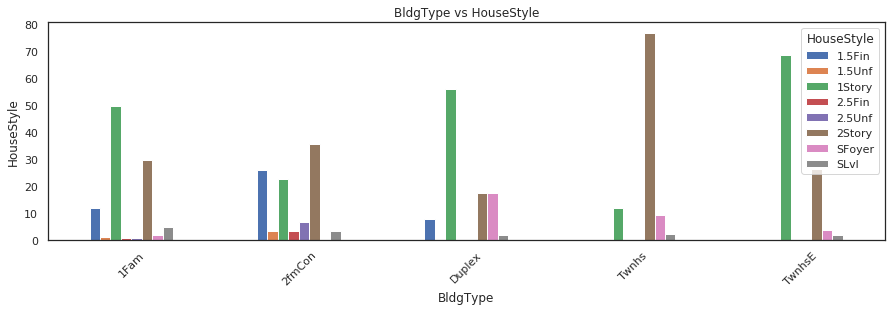

In [39]:
bivariate(price,'BldgType','HouseStyle')



##Correlation for continuous variables




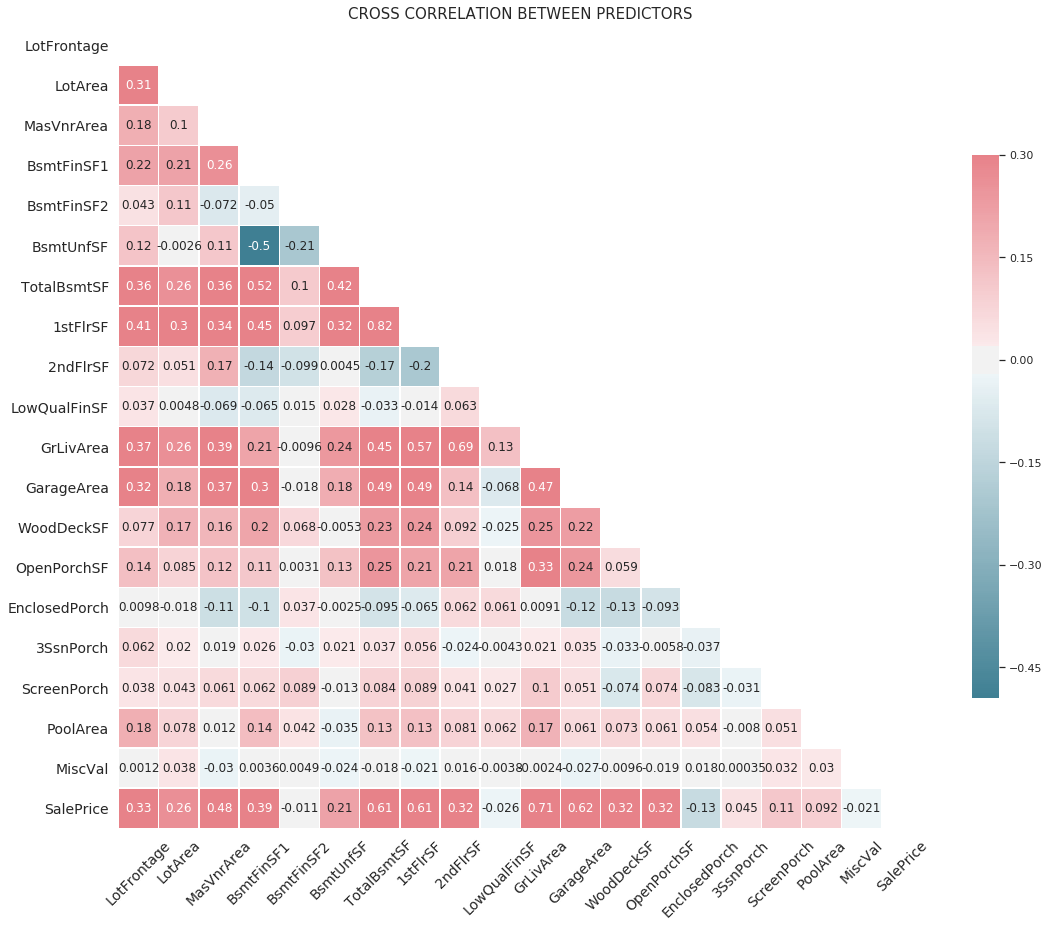

In [40]:

corr=price[cont1.columns].corr()

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax= sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot= True);
plt.title("CROSS CORRELATION BETWEEN PREDICTORS", fontsize=15)
plt.xticks(rotation= 45,fontsize=14)
plt.yticks(rotation= 0,fontsize=14)

plt.show()

#Checking VIF


In [41]:
cont2 = price.select_dtypes(include =['float64'])


from patsy import dmatrices

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(cont2.values,i) 
                   for i in range(cont2.shape[1])]
vif["featues"]=cont2.columns
vif.round(1)

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,featues
0,11.8,LotFrontage
1,2.5,LotArea
2,1.7,MasVnrArea
3,inf,BsmtFinSF1
4,inf,BsmtFinSF2
5,inf,BsmtUnfSF
6,inf,TotalBsmtSF
7,inf,1stFlrSF
8,inf,2ndFlrSF
9,inf,LowQualFinSF


##From Correlation Plot we can see that GrLivArea and TotalBsmtSF has high correlation with other variables. Hence removing these variables


In [0]:
cont3=cont2.drop(['GrLivArea','TotalBsmtSF','1stFlrSF','GarageArea','LotFrontage'],axis=1)

##Rechecking vif after removing variables


In [43]:
vif1=pd.DataFrame()
vif1["VIF Factor"]=[variance_inflation_factor(cont3.values,i) 
                   for i in range(cont3.shape[1])]
vif1["featues"]=cont3.columns
vif1.round(1)


,VIF Factor,featues
0,2.4,LotArea
1,1.7,MasVnrArea
2,5.0,BsmtFinSF1
3,1.3,BsmtFinSF2
4,5.0,BsmtUnfSF
5,2.5,2ndFlrSF
6,1.0,LowQualFinSF
7,1.9,WoodDeckSF
8,1.7,OpenPorchSF
9,1.2,EnclosedPorch


##Below variables are leading to multicollinearity issue 
##GrLivArea,TotalBsmtSF,1stFlrSF,GarageArea,LotFrontage

#Creating dummies


In [44]:
imp_catvars=['Street','Utilities','LandSlope','CentralAir','PavedDrive']
price5=price.copy()
price5_copy= pd.get_dummies(price5, columns=imp_catvars)
price5_copy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,60,RL,65.0,8450.0,Grvl,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,SBrkr,856.0,854.0,0.0,1710.0,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003,RFn,2,548.0,TA,TA,0.0,61.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,2,2008,WD,Normal,208500.0,0,1,1,0,1,0,0,0,1,0,0,1
1,20,RL,80.0,9600.0,Grvl,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,SBrkr,1262.0,0.0,0.0,1262.0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460.0,TA,TA,298.0,0.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,5,2007,WD,Normal,181500.0,0,1,1,0,1,0,0,0,1,0,0,1
2,60,RL,68.0,11250.0,Grvl,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,SBrkr,920.0,866.0,0.0,1786.0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608.0,TA,TA,0.0,42.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,9,2008,WD,Normal,223500.0,0,1,1,0,1,0,0,0,1,0,0,1
3,70,RL,60.0,9550.0,Grvl,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,SBrkr,961.0,756.0,0.0,1717.0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642.0,TA,TA,0.0,35.0,272.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,2,2006,WD,Abnorml,140000.0,0,1,1,0,1,0,0,0,1,0,0,1
4,60,RL,84.0,14260.0,Grvl,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,SBrkr,1145.0,1053.0,0.0,2198.0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836.0,TA,TA,192.0,84.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,12,2008,WD,Normal,250000.0,0,1,1,0,1,0,0,0,1,0,0,1


#Label Encoding Years


In [45]:
price6=price5_copy.copy()
yr=['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in yr:
    price6[col] = le.fit_transform(price6[col].astype(str) )

pd.set_option('display.max_columns', 300)
price6.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,60,RL,65.0,8450.0,Grvl,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,104,53,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,SBrkr,856.0,854.0,0.0,1710.0,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,89,RFn,2,548.0,TA,TA,0.0,61.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,2,2,WD,Normal,208500.0,0,1,1,0,1,0,0,0,1,0,0,1
1,20,RL,80.0,9600.0,Grvl,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,77,26,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,SBrkr,1262.0,0.0,0.0,1262.0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,62,RFn,2,460.0,TA,TA,298.0,0.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,5,1,WD,Normal,181500.0,0,1,1,0,1,0,0,0,1,0,0,1
2,60,RL,68.0,11250.0,Grvl,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,102,52,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,SBrkr,920.0,866.0,0.0,1786.0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,87,RFn,2,608.0,TA,TA,0.0,42.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,9,2,WD,Normal,223500.0,0,1,1,0,1,0,0,0,1,0,0,1
3,70,RL,60.0,9550.0,Grvl,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,19,20,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,SBrkr,961.0,756.0,0.0,1717.0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,84,Unf,3,642.0,TA,TA,0.0,35.0,272.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,2,0,WD,Abnorml,140000.0,0,1,1,0,1,0,0,0,1,0,0,1
4,60,RL,84.0,14260.0,Grvl,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,101,50,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,SBrkr,1145.0,1053.0,0.0,2198.0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,86,RFn,3,836.0,TA,TA,192.0,84.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,12,2,WD,Normal,250000.0,0,1,1,0,1,0,0,0,1,0,0,1


In [0]:
price7=price6.select_dtypes(include=['float64','int64','uint8'])


##Dropping Pool Area as the data is highly skewed as we have seen in the plot above. It might affect the model







In [0]:
price7=price7.drop(['PoolArea'],axis=1)

In [48]:
price7.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,60,65.0,8450.0,7,5,104,53,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1,0,2,1,3,1,8,0,89,2,548.0,0.0,61.0,0.0,0.0,0.0,0.0,2,2,208500.0,0,1,1,0,1,0,0,0,1,0,0,1
1,20,80.0,9600.0,6,8,77,26,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0,1,2,0,3,1,6,1,62,2,460.0,298.0,0.0,0.0,0.0,0.0,0.0,5,1,181500.0,0,1,1,0,1,0,0,0,1,0,0,1
2,60,68.0,11250.0,7,5,102,52,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1,0,2,1,3,1,6,1,87,2,608.0,0.0,42.0,0.0,0.0,0.0,0.0,9,2,223500.0,0,1,1,0,1,0,0,0,1,0,0,1
3,70,60.0,9550.0,7,5,19,20,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1,0,1,0,3,1,7,1,84,3,642.0,0.0,35.0,272.0,0.0,0.0,0.0,2,0,140000.0,0,1,1,0,1,0,0,0,1,0,0,1
4,60,84.0,14260.0,8,5,101,50,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1,0,2,1,4,1,9,1,86,3,836.0,192.0,84.0,0.0,0.0,0.0,0.0,12,2,250000.0,0,1,1,0,1,0,0,0,1,0,0,1


##Regression model results will be more accurate when Target Variable follows Normal Distribution 
##Sale Price has skewed distribution so we are applying log transformation


In [49]:

price8=price7.copy()

price8["SalePrice"]= np.log(price7['SalePrice'])

price8.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,60,65.0,8450.0,7,5,104,53,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1,0,2,1,3,1,8,0,89,2,548.0,0.0,61.0,0.0,0.0,0.0,0.0,2,2,12.247694,0,1,1,0,1,0,0,0,1,0,0,1
1,20,80.0,9600.0,6,8,77,26,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0,1,2,0,3,1,6,1,62,2,460.0,298.0,0.0,0.0,0.0,0.0,0.0,5,1,12.109011,0,1,1,0,1,0,0,0,1,0,0,1
2,60,68.0,11250.0,7,5,102,52,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1,0,2,1,3,1,6,1,87,2,608.0,0.0,42.0,0.0,0.0,0.0,0.0,9,2,12.317167,0,1,1,0,1,0,0,0,1,0,0,1
3,70,60.0,9550.0,7,5,19,20,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1,0,1,0,3,1,7,1,84,3,642.0,0.0,35.0,272.0,0.0,0.0,0.0,2,0,11.849398,0,1,1,0,1,0,0,0,1,0,0,1
4,60,84.0,14260.0,8,5,101,50,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1,0,2,1,4,1,9,1,86,3,836.0,192.0,84.0,0.0,0.0,0.0,0.0,12,2,12.429216,0,1,1,0,1,0,0,0,1,0,0,1


#Model Building


In [50]:
price9=price8.copy()

import statsmodels.formula.api as sm
from sklearn import linear_model
x=price9.drop(['SalePrice'],axis=1)
y=price9['SalePrice']
model = sm.ols(formula='y~x',data=price9)
fitted=model.fit()
fitted.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     237.7
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        06:45:45   Log-Likelihood:                 758.84
No. Observations:                1460   AIC:                            -1436.
Df Residuals:                    1419   BIC:                            -1219.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2159      0.030    107.653      0.000       3.157       3.274
x[0]          -0.0006      0.000     -5.489      0.000      -0.001      -0.000
x[1]          -0.0002      0.000     -1.097      0.273      -0.001       0.000
x[2]        2.158e-06   5.24e-07      4.117      0.000    1.13e-06    3.19e-06
x[3]           0.0851      0.005     16.916      0.000       0.075       0.095
x[4]           0.0442      0.005      9.742      0.000       0.035       0.053
x[5]           0.0028      0.000      8.515      0.000       0.002       0.003
x[6]           0.0011      0.000      3.879      0.000       0.001       0.002
x[7]        1.746e-05    2.5e-05      0.697      0.486   -3.16e-05    6.66e-05
x[8]        2.223e-05   1.07e-05      2.080      0.038    1.26e-06    4.32e-05
x[9]        1.506e-05    1.9e-05      0.791      0.429   -2.23e-05    5.24e-05
x[10]       7.227e-06   1.02e-05      0.710      0.478   -1.27e-05    2.72e-05
x[11]       4.452e-05   1.42e-05      3.140      0.002    1.67e-05    7.23e-05
x[12]       6.429e-05    2.6e-05      2.470      0.014    1.32e-05       0.000
x[13]       3.742e-05   2.42e-05      1.549      0.122   -9.96e-06    8.48e-05
x[14]       1.405e-05   6.31e-05      0.223      0.824      -0.000       0.000
x[15]          0.0001    2.4e-05      4.821      0.000    6.87e-05       0.000
x[16]          0.0657      0.011      5.978      0.000       0.044       0.087
x[17]          0.0193      0.017      1.115      0.265      -0.015       0.053
x[18]          0.0420      0.012      3.503      0.000       0.018       0.065
x[19]          0.0216      0.011      1.935      0.053      -0.000       0.044
x[20]         -0.0040      0.007     -0.556      0.579      -0.018       0.010
x[21]         -0.0392      0.022     -1.773      0.076      -0.082       0.004
x[22]          0.0187      0.005      3.603      0.000       0.009       0.029
x[23]          0.0424      0.008      5.633      0.000       0.028       0.057
x[24]         -0.0002      0.000     -0.628      0.530      -0.001       0.000
x[25]          0.0662      0.012      5.405      0.000       0.042       0.090
x[26]       2.463e-05   4.16e-05      0.592      0.554    -5.7e-05       0.000
x[27]          0.0001   3.37e-05      3.339      0.001    4.64e-05       0.000
x[28]       1.991e-06   6.43e-05      0.031      0.975      -0.000       0.000
x[29]          0.0002   7.08e-05      2.229      0.026     1.9e-05       0.000
x[30]          0.0002      0.000      1.743      0.081   -2.88e-05       0.000
x[31]          0.0003   7.27e-05      4.792      0.000       0.000       0.000
x[32]      -2.603e-06    7.8e-06     -0.334      0.739   -1.79e-05    1.27e-05
x[33]          0.0004      0.001      0.275      0.784      -0.002       0.003
x[34]         -0.0059      0.003     -1.986      0.047      -0.012   -7.11e-05
x[

##Building the model again by eliminating multicollinearity

In [51]:
price10=price9.drop(['GrLivArea','TotalBsmtSF','1stFlrSF','GarageArea','LotFrontage'],axis=1)

x1=price10.drop(['SalePrice'],axis=1)
y1=price10['SalePrice']
model1 = sm.ols(formula='y1~x1',data=price10)
fitted1=model1.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     246.2
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        06:45:45   Log-Likelihood:                 730.22
No. Observations:                1460   AIC:                            -1384.
Df Residuals:                    1422   BIC:                            -1184.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2143      0.030    105.841      0.000       3.155       3.274
x1[0]         -0.0006      0.000     -5.757      0.000      -0.001      -0.000
x1[1]       2.337e-06   5.24e-07      4.464      0.000    1.31e-06    3.36e-06
x1[2]          0.0893      0.005     17.544      0.000       0.079       0.099
x1[3]          0.0419      0.005      9.091      0.000       0.033       0.051
x1[4]          0.0024      0.000      7.217      0.000       0.002       0.003
x1[5]          0.0013      0.000      4.331      0.000       0.001       0.002
x1[6]       3.666e-05   2.53e-05      1.447      0.148    -1.3e-05    8.64e-05
x1[7]          0.0001   1.66e-05      8.859      0.000       0.000       0.000
x1[8]          0.0001   2.82e-05      4.963      0.000    8.47e-05       0.000
x1[9]          0.0001   1.55e-05      7.717      0.000     8.9e-05       0.000
x1[10]      7.543e-05   1.81e-05      4.177      0.000       4e-05       0.000
x1[11]      8.994e-05   8.55e-05      1.052      0.293   -7.77e-05       0.000
x1[12]         0.0614      0.011      5.493      0.000       0.039       0.083
x1[13]         0.0158      0.018      0.898      0.369      -0.019       0.050
x1[14]         0.0618      0.012      5.228      0.000       0.039       0.085
x1[15]         0.0226      0.011      1.994      0.046       0.000       0.045
x1[16]        -0.0058      0.007     -0.795      0.426      -0.020       0.008
x1[17]        -0.0265      0.022     -1.185      0.236      -0.070       0.017
x1[18]         0.0345      0.005      7.153      0.000       0.025       0.044
x1[19]         0.0535      0.007      7.183      0.000       0.039       0.068
x1[20]        -0.0002      0.000     -0.680      0.497      -0.001       0.000
x1[21]         0.0768      0.007     10.419      0.000       0.062       0.091
x1[22]         0.0001   3.41e-05      3.944      0.000    6.76e-05       0.000
x1[23]      3.372e-05   6.52e-05      0.517      0.605   -9.42e-05       0.000
x1[24]         0.0002    7.2e-05      2.401      0.016    3.17e-05       0.000
x1[25]         0.0003      0.000      2.055      0.040    1.25e-05       0.001
x1[26]         0.0004    7.4e-05      4.853      0.000       0.000       0.001
x1[27]     -4.193e-06   7.94e-06     -0.528      0.597   -1.98e-05    1.14e-05
x1[28]         0.0005      0.001      0.354      0.724      -0.002       0.003
x1[29]        -0.0060      0.003     -1.983      0.048      -0.012   -6.28e-05
x1[30]         1.5088      0.039     38.303      0.000       1.432       1.586
x1[31]         1.7055      0.031     55.771      0.000       1.646       1.766
x1[32]         1.7011      0.065     26.365      0.000       1.575       1.828
x1[33]         1.5132      0.088     17.101      0.000       1.340       1.687
x1[34]         1.0453      0.020     52.667      0.000       1.006       1.084
x1


##Adjusted R square almost remains same so this is a good model



##Let us check if we can optimise the model


#Model Optimization using RFE(Recursive Feature Elimination)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
# price2.replace(['inf','-inf'], np.nan)
# price2.dropna(inplace=True)

x3=price9.drop(['SalePrice'],axis=1)
y3=price9['SalePrice']
#Recursive feature Elimination
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model,80)
#Transforming data using RFE
X_rfe = rfe.fit_transform(x3,y3)  
#Fitting the data to model
model.fit(X_rfe,y3)
# print(rfe.support_)
# print(rfe.ranking_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##Checking Optimum Features

In [53]:

from sklearn.model_selection import train_test_split
nof_list=np.arange(1,80)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x3,y3, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 24
Score with 24 features: 0.825450


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


y2_predict=model.predict(X_test)


In [0]:
# print("Mean Squared Error:",mean_squared_error(y_test,y2_predict))
# print("Residual Sum of Squares:%.2f"%np.mean((linreg.predict(X_test_rfe)-y_test)**2))


###Plotting graph of Features vs Score






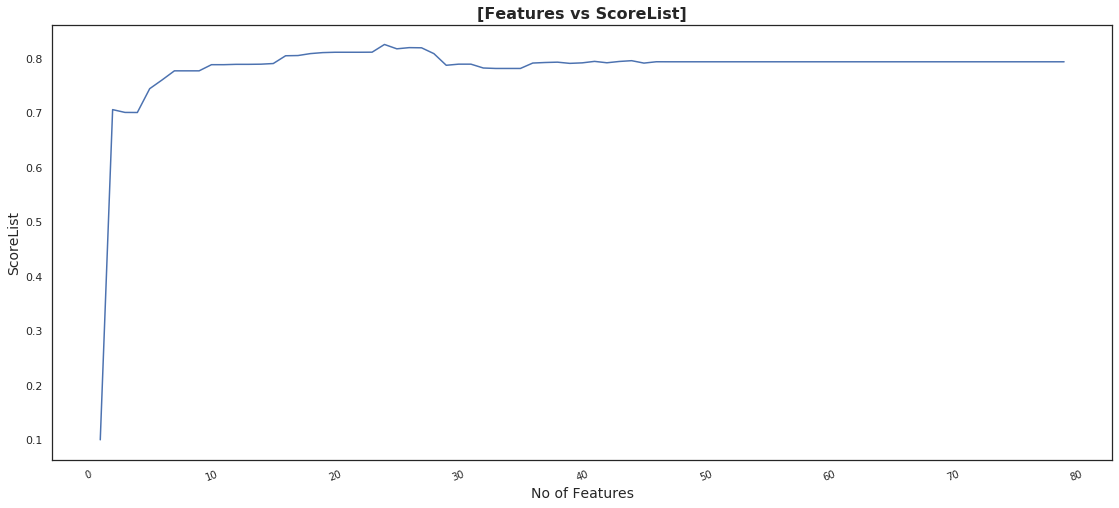

In [55]:
plt.figure(figsize=(19,8))
sns.lineplot(x=nof_list, y=score_list)
plt.xlabel('No of Features', fontsize=14)
plt.ylabel("ScoreList",fontsize=14)
plt.xticks(rotation=20,fontsize=10)
plt.xticks(rotation=20,fontsize=10)
plt.title("[Features vs ScoreList]",fontsize=16).set_weight('bold')
plt.show()

## We can see that the score is almost constant from 29 features

##View Selected Features

In [56]:

cols = list(x3.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 29)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(x3,y3)  
#Fitting the data to model
model.fit(X_rfe,y3)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'ScreenPorch', 'MoSold', 'YrSold', 'Street_Grvl',
       'Street_Pave', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LandSlope_Gtl',
       'LandSlope_Sev', 'CentralAir_N', 'CentralAir_Y', 'PavedDrive_N',
       'PavedDrive_P', 'PavedDrive_Y'],
      dtype='object')


##New model with optimized features

In [60]:
xfin=price9[selected_features_rfe]
yfin=price9['SalePrice']
mfin=pd.concat([xfin,yfin], axis=1)
import statsmodels.formula.api as sm


mod1 = sm.ols(formula='yfin~xfin',data=mfin)
fit1=mod1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   yfin   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     361.9
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        06:56:32   Log-Likelihood:                 720.65
No. Observations:                1460   AIC:                            -1389.
Df Residuals:                    1434   BIC:                            -1252.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6196      0.033    109.498      0.000       3.555       3.684
xfin[0]       -0.0009      0.000     -8.715      0.000      -0.001      -0.001
xfin[1]        0.0901      0.005     18.342      0.000       0.080       0.100
xfin[2]        0.0437      0.004      9.732      0.000       0.035       0.053
xfin[3]        0.0029      0.000     10.333      0.000       0.002       0.003
xfin[4]        0.0010      0.000      3.413      0.001       0.000       0.002
xfin[5]        0.0002   1.75e-05     12.424      0.000       0.000       0.000
xfin[6]        0.0920      0.008     11.115      0.000       0.076       0.108
xfin[7]        0.0392      0.017      2.307      0.021       0.006       0.073
xfin[8]        0.0346      0.012      2.917      0.004       0.011       0.058
xfin[9]       -0.0056      0.010     -0.584      0.559      -0.024       0.013
xfin[10]      -0.0086      0.007     -1.198      0.231      -0.023       0.005
xfin[11]      -0.0284      0.022     -1.315      0.189      -0.071       0.014
xfin[12]       0.0150      0.005      2.845      0.005       0.005       0.025
xfin[13]       0.0504      0.007      6.810      0.000       0.036       0.065
xfin[14]       0.0763      0.007     10.486      0.000       0.062       0.091
xfin[15]       0.0003   7.25e-05      4.365      0.000       0.000       0.000
xfin[16]      -0.0002      0.001     -0.117      0.907      -0.003       0.003
xfin[17]      -0.0062      0.003     -2.071      0.039      -0.012      -0.000
xfin[18]       1.7448      0.039     44.202      0.000       1.667       1.822
xfin[19]       1.8748      0.031     60.735      0.000       1.814       1.935
xfin[20]       1.9212      0.063     30.533      0.000       1.798       2.045
xfin[21]       1.6983      0.090     18.952      0.000       1.523       1.874
xfin[22]      -0.0619      0.019     -3.182      0.001      -0.100      -0.024
xfin[23]       0.0575      0.046      1.251      0.211      -0.033       0.148
xfin[24]       1.7805      0.019     95.118      0.000       1.744       1.817
xfin[25]       1.8391      0.019     95.310      0.000       1.801       1.877
xfin[26]       1.1776      0.018     66.190      0.000       1.143       1.212
xfin[27]       1.2175      0.023     53.128      0.000       1.173       1.262
xfin[28]       1.2245      0.016     77.478      0.000       1.194       1.256
==============================================================================
Omnibus:                      800.435   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23588.656
Skew:                          -1.985   Prob(JB):                         0.00
Kurtosis:                      22.287   Cond. No.                     1.06e+16
==============================================================================

W


##Using 42 features our Adjusted R-suare is 86%

##Using 29 features our Adjusted R-square is 86%

##So we can use the optimized model as there is no difference in Adjusted R-Square 




#Residual plots 

In [0]:

pred_val = fit1.fittedvalues.copy()
true_val = mfin["SalePrice"].values.copy()
residual = true_val - pred_val

##Checking Continuous variables in the final model 

In [62]:

m1=set(cont2.columns).intersection(set(xfin.columns))
m1

{'GrLivArea', 'ScreenPorch'}

##Residual Plot for GrLivArea

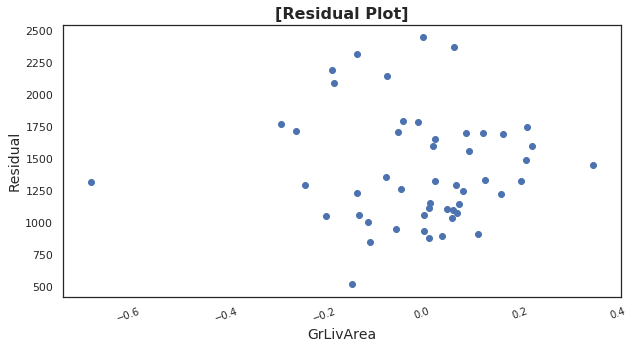

In [64]:

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.scatter(residual[:50], mfin['GrLivArea'][:50])

plt.xlabel('GrLivArea', fontsize=14)
plt.ylabel("Residual",fontsize=14)
plt.xticks(rotation=20,fontsize=10)
plt.xticks(rotation=20,fontsize=10)
plt.title("[Residual Plot]",fontsize=16).set_weight('bold')
plt.show()

##Residual Plot for ScreenPorch

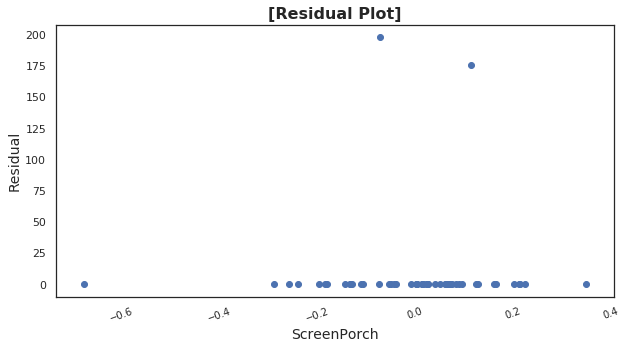

In [65]:

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.scatter(residual[:50], mfin['ScreenPorch'][:50])

plt.xlabel('ScreenPorch', fontsize=14)
plt.ylabel("Residual",fontsize=14)
plt.xticks(rotation=20,fontsize=10)
plt.xticks(rotation=20,fontsize=10)
plt.title("[Residual Plot]",fontsize=16).set_weight('bold')
plt.show()

##Checking RMSE & Residual Sum of Squares

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split 

X2_train, X2_test, y2_train, y2_test = train_test_split(xfin, yfin, test_size=0.4, 
                                                    random_state=1) 
from sklearn.preprocessing import MinMaxScaler
std=MinMaxScaler()
X2_train= std.fit_transform(X2_train.values)
X2_test= std.transform(X2_test.values)
std=MinMaxScaler()
y2_train= std.fit_transform(y2_train.values.reshape(-1, 1))
y2_test= std.transform(y2_test.values.reshape(-1, 1))
linreg=LinearRegression()
linreg.fit(X2_train,y2_train)
y2_predict=linreg.predict(X2_test)
print("Mean Squared Error:",mean_squared_error(y2_test,y2_predict))
print("Residual Sum of Squares:%.2f"%np.mean((linreg.predict(X2_test)-y2_test)**2))


Mean Squared Error: 0.0031449551377557773
Residual Sum of Squares:0.00
